Número de ciclos > 15
 Amplitude média > 4.216442891362309
         Periodo > 7.055571428571429
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                             ┃
┃            Ex_02            ┃
┃                             ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃  -xx[0] >                   ┃
┃     - 3.5                   ┃
┃  -Número de ciclos >        ┃
┃     - 15                    ┃
┃  -Amplitude média >         ┃
┃     - 4.2164                ┃
┃  -Periodo >                 ┃
┃     - 7.0556                ┃
┃  -Emec inicial >            ┃
┃     - 10.35                 ┃
┃  -Emec final >              ┃
┃     - 10.4665               ┃
┃                             ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛


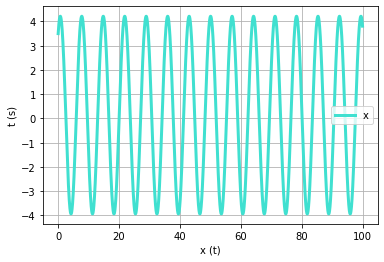

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Tempo inicial e final
ti = 0
tf = 100

# Massa
m = 1.5
k = 1.2
alpha = -0.01

# Posição inicial
xx0 = 3.5

# Aceleração inicial
ax0 = 0

# Velocidade inicial
vx0 = 2

# dt incremento do tempo e n numero de intervalos
dt = 0.001
n = int((tf - ti) / dt)


# Vetor tempo (n+1 para garantir que nao falta o ultimo dado (Ex: t[10]))
t = np.linspace(ti, tf, n + 1)

# Vetor velocidade (empty e não zeros para não alterar 
# muito o resultado se faltar analisar um dado)
Emec = np.empty(n + 1)
xx = np.empty(n + 1)
vx = np.empty(n + 1)
ax = np.empty(n + 1)

# Introduzir x0 e v0 nos vetores da posição e velocidade
xx[0] = xx0
vx[0] = vx0
ax[0] = ax0

# Soma das amplitudes máximas sao máximas (x[i-1] < x[i] > x[i-1])
amps = 0
# Array de tempos (o seu tamanho é o número de amplitudes máximas encontradas (para fazer a média))
nAmps = []

periodoArray = []

# Preencher os vetores x, v, a
for i in range(n):    
    #           (mola | amortecimento | f0 externa) / m
    ax[i] = (-k * xx[i] - 3 * alpha * xx[i]**2 ) / m
    vx[i + 1] = vx[i] + ax[i] * dt
    xx[i + 1] = xx[i] + vx[i + 1] * dt
    
    Emec[i] = 0.5 * m * vx[i]**2 + 0.5 * k  * xx[i]**2
    
    # Somar as amplitudes médias encontradas e incrementar o número destas encontradas
    #                                                 t > 200s para ser regime estacionário (mais ou menos)
    if (xx[i - 1] < xx[i]) and (xx[i] > xx[i + 1]):
        amps += xx[i]
        nAmps.append(t[i])


Emec[-1] = 0.5 * m * vx[-1]**2 + 0.5 * k  * xx[-1]**2
        
for i in range(1, len(nAmps)):
    periodoArray.append(nAmps[i] - nAmps[i-1])
    
    
# Periodo = soma dos periodos / numero destes encontradas
periodo = sum(periodoArray) / len(periodoArray)
        
# Amplitude = soma das amplitudes / numero destas encontradas
amplitude = amps / len(nAmps)
    
print("Número de ciclos >", len(nAmps))
print(" Amplitude média >", amplitude)
print("         Periodo >", periodo)
    

print("┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓")
print("┃                             ┃")
print("┃            Ex_02            ┃")
print("┃                             ┃")
print("┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫")
print("┃  -xx[0] >                   ┃")
print("┃     - %-8s              ┃" % xx[0])
print("┃  -Número de ciclos >        ┃")
print("┃     - %-8s              ┃" % len(nAmps))
print("┃  -Amplitude média >         ┃")
print("┃     - %-8s              ┃" % np.round(amplitude, 4))
print("┃  -Periodo >                 ┃")
print("┃     - %-8s              ┃" % np.round(periodo, 4))
print("┃  -Emec inicial >            ┃")
print("┃     - %-8s              ┃" % np.round(Emec[0], 4))
print("┃  -Emec final >              ┃")
print("┃     - %-8s              ┃" % np.round(Emec[-1], 4))
print("┃                             ┃")
print("┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛")

# Plot
plt.plot(t, xx, label="x",  linestyle='-', linewidth=3, color="turquoise")
plt.xlabel("x (t)")
plt.ylabel("t (s)")
plt.legend()         # Legenda só aparece com isto
plt.grid()
plt.show()
    
    